In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#reading the csv file 
iris = pd.read_csv("D:/Iris (1).csv")

In [7]:
#printing top 5 rows 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#identifying the dataset with number of rows and columns 

print(iris.shape)

(150, 6)


In [9]:
# gaining the info

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#statistical summary of the dataset using describe 
# count,mean,std dev,min,Q1,Q2,Q3 and max

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Checking missing values 

In [15]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# This indicates that there are no null values in the given dataset 

In [ ]:
Checking Duplicates 

In [17]:
data = iris.drop_duplicates(subset = "Species")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
#There are only 3 unique values and no duplicates 

In [19]:
#Check the count of values for each species 

iris.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
DATA VISUALIZATION 

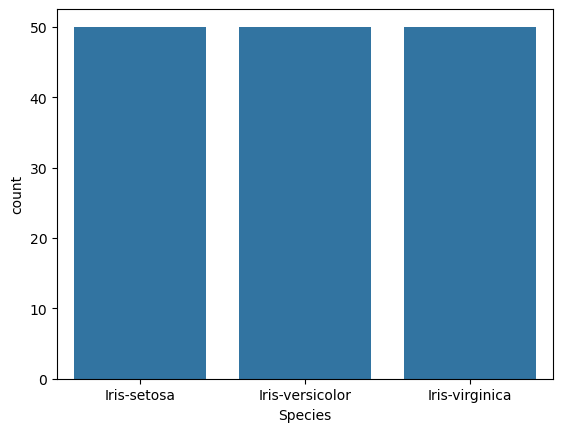

In [21]:
#Visualizing Target Column that is Species 
#creating a count plot to count the values of each species

import seaborn as sns 
import matplotlib.pyplot as plt 

sns.countplot(x ="Species",data = iris)
plt.show()

In [ ]:
#This indicates that there is a equal distribution between the three species 

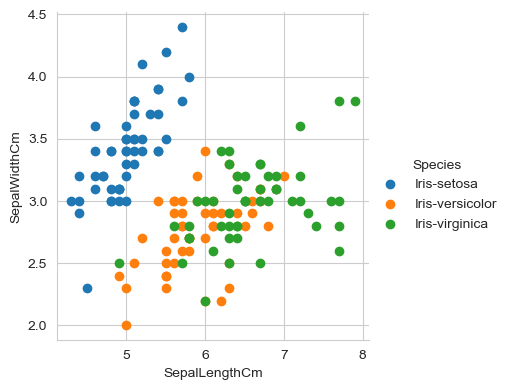

In [9]:
#Relation between variables 
#2-D Scatter plot with color-coding for each flower type/class
#sns corresponds to seaborn 


sns.set_style("whitegrid");
sns.FacetGrid(iris,hue ="Species", height=4)\
   .map(plt.scatter , "SepalLengthCm","SepalWidthCm")\
   .add_legend();
plt.show();

In [ ]:
# From the above plot we can infer that 
#1 Species Setosa has smaller sepal lengths but large sepal widths
#2 Versicolor Species lies in middle of the other two species
#3 Virginica has larger sepal lengths 

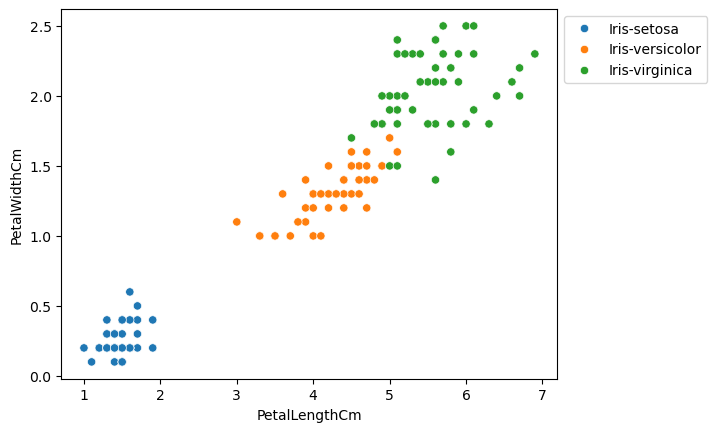

In [23]:
#Comparing Petal Length and Width 

sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue ='Species',data=iris)
plt.legend(bbox_to_anchor = (1,1),loc = 2)
plt.show()

In [ ]:
Histograms

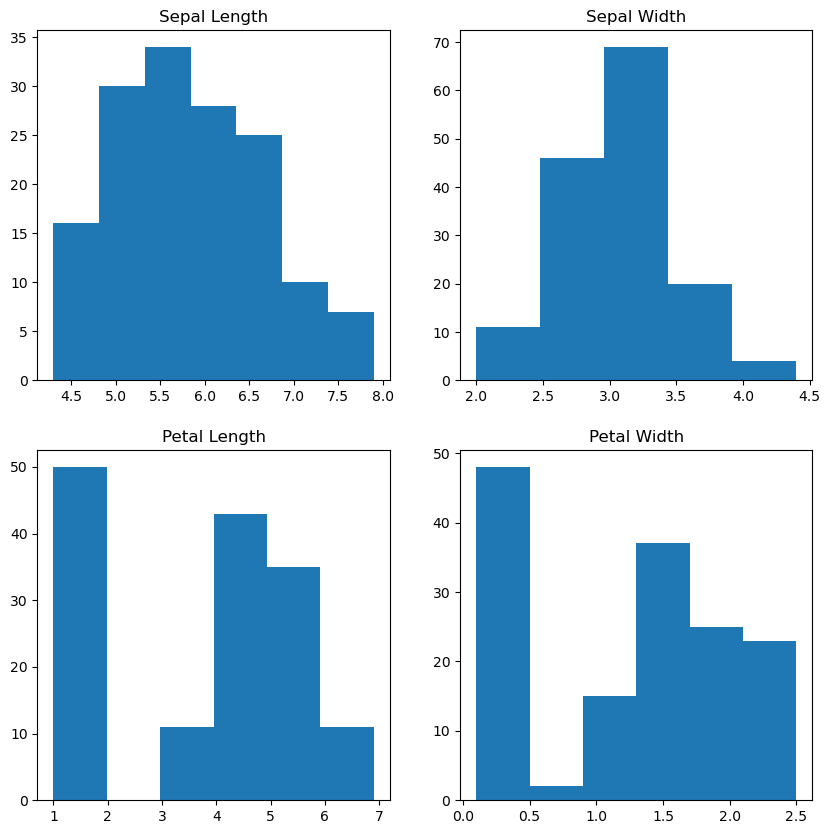

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['PetalWidthCm'], bins=6);

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


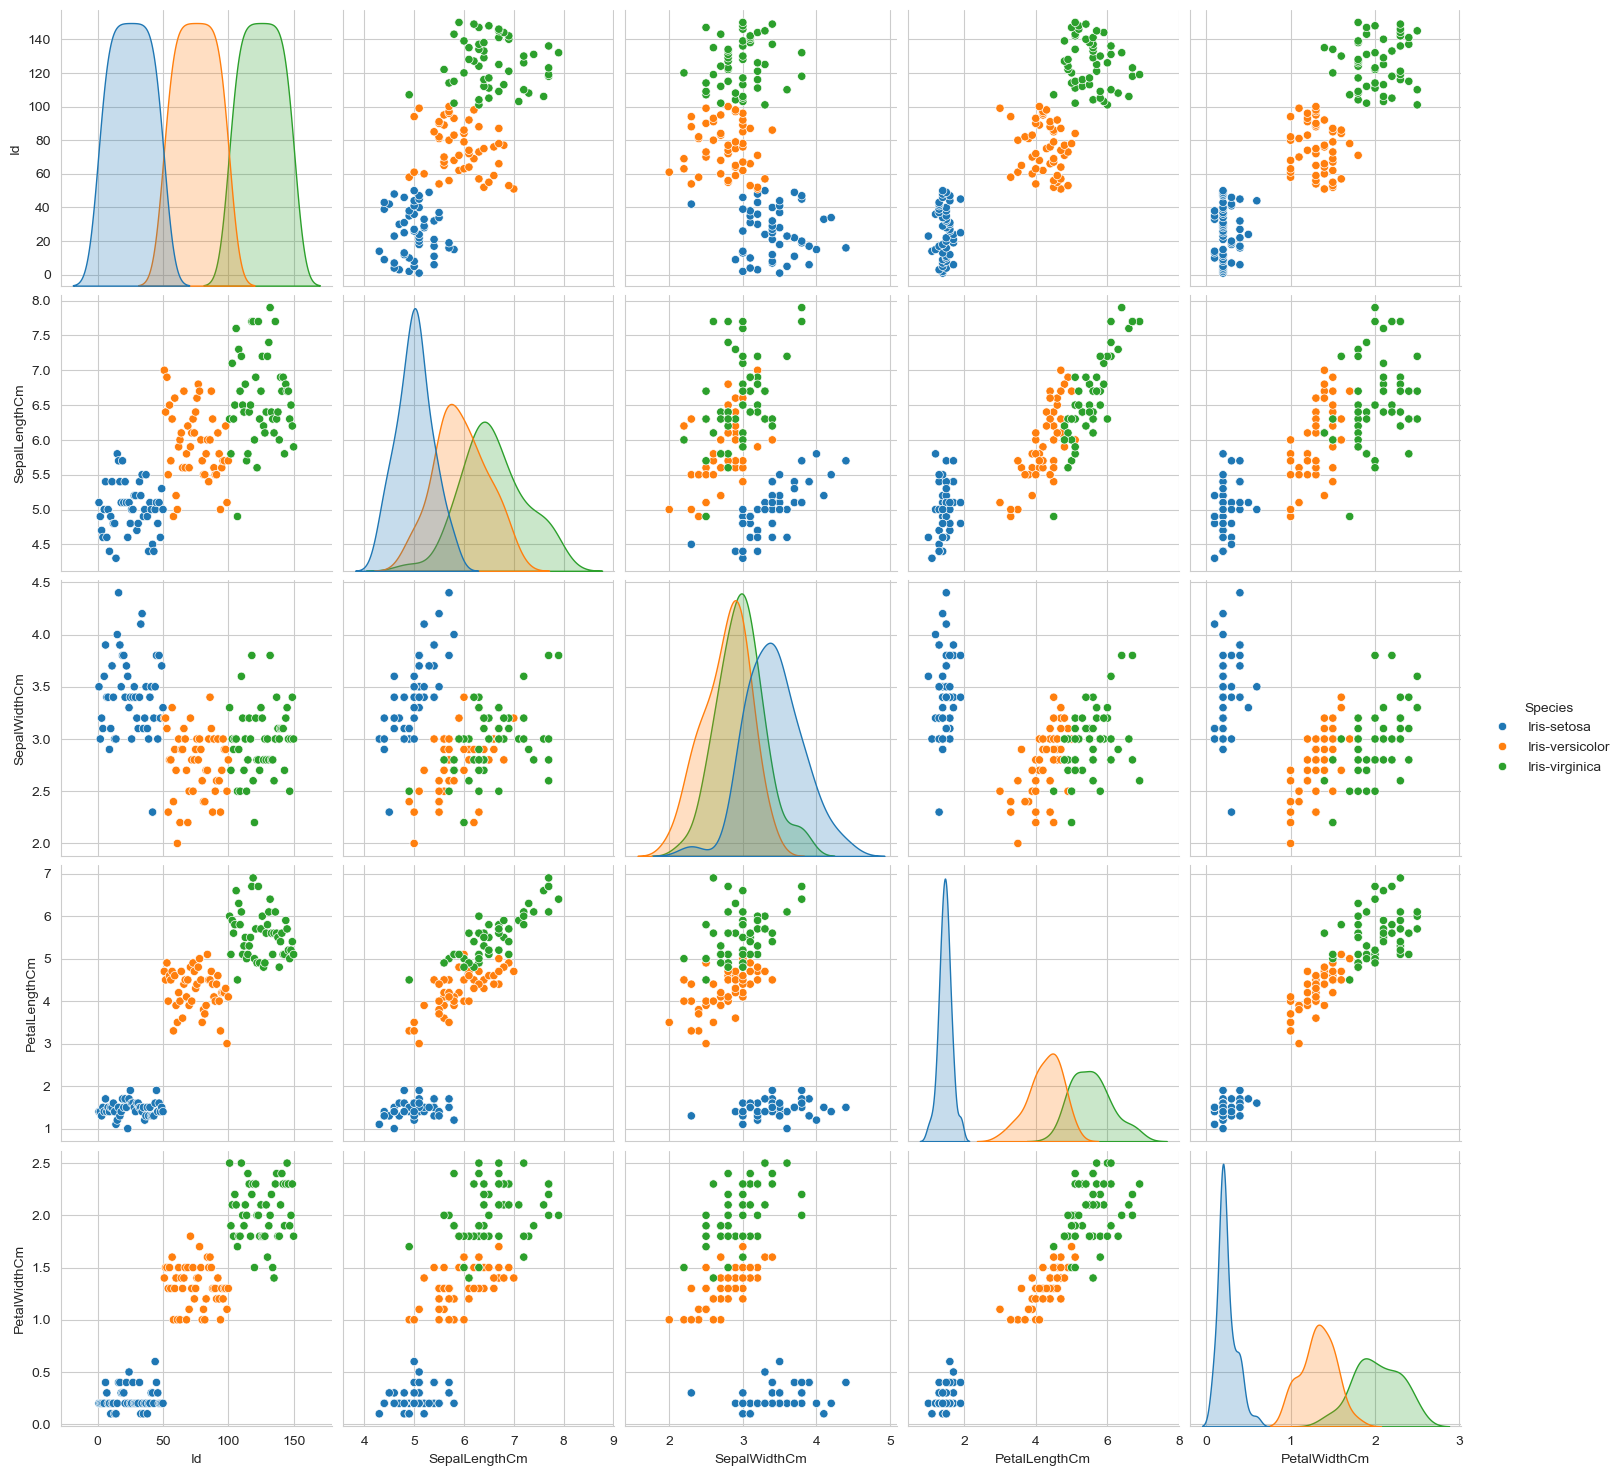

In [55]:
#Pairwise scatter PLot : Pair-Plot
#Dis-advanatges 
##Can be used when number of features are high 
##Cannot visualize higher dimensional patterns in 3-D AND 4-D
##Only possible to view 2D patterns

plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris , hue ="Species", size = 3 , diag_kind ="kde");
plt.show()

In [ ]:
Observations
1)Petal length and Petal Width are the most useful features to identify various Flowers 
2)While Setosa can be easily identified (lineraly seperable) , Virginica and Versicolor have some overlap 

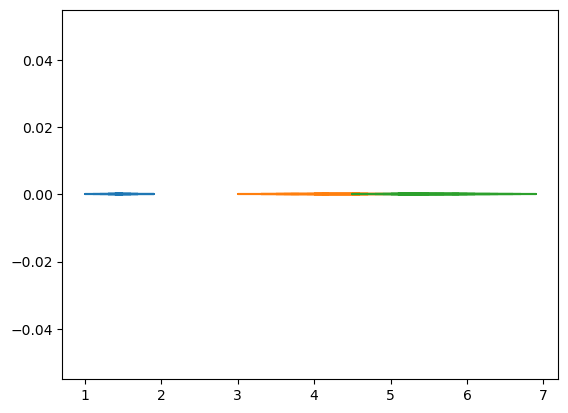

In [13]:
#What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal_lenght

import numpy as np
iris_setosa = iris.loc[iris["Species"]== "Iris-setosa"];
iris_virginica = iris.loc[iris["Species"] =="Iris-virginica"];
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];

#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["PetalLengthCm"],np.zeros_like(iris_setosa["PetalLengthCm"]))
plt.plot(iris_versicolor["PetalLengthCm"],np.zeros_like(iris_versicolor["PetalLengthCm"]))
plt.plot(iris_virginica["PetalLengthCm"],np.zeros_like(iris_versicolor["PetalLengthCm"]))
plt.show()

In [ ]:
Histogram with displot plot 

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Li

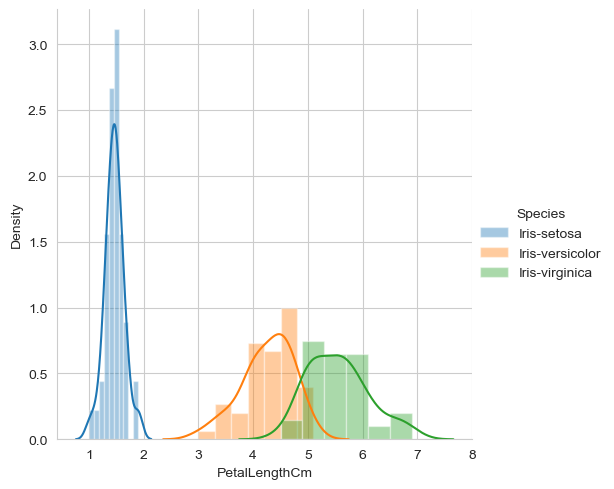

In [19]:
#HISTOGRAM WITH DISPLOT PLOT


sns.FacetGrid(iris,hue="Species" , height =5)\
    .map(sns.distplot ,"PetalLengthCm")\
    .add_legend();
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Li

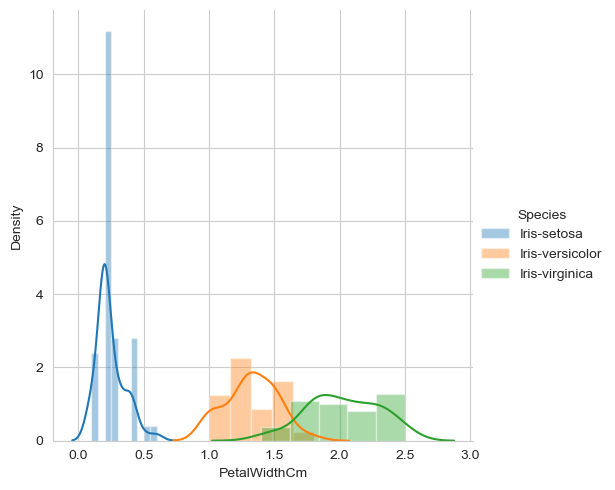

In [21]:
sns.FacetGrid(iris,hue="Species" , height =5)\
    .map(sns.distplot ,"PetalWidthCm")\
    .add_legend();
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Li

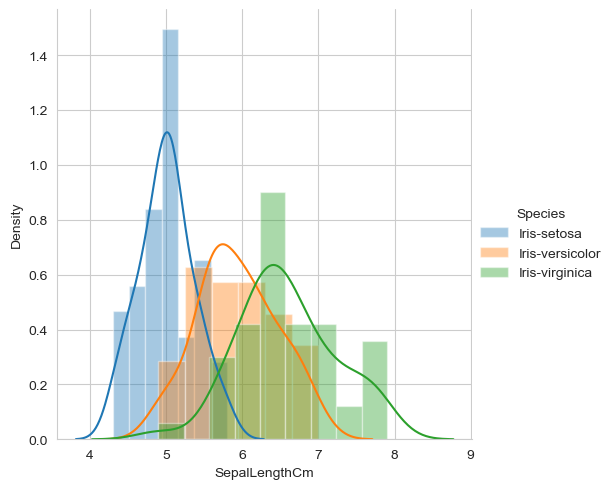

In [23]:
sns.FacetGrid(iris,hue="Species" , height =5)\
    .map(sns.distplot ,"SepalLengthCm")\
    .add_legend();
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\lenovo\anaconda3\Li

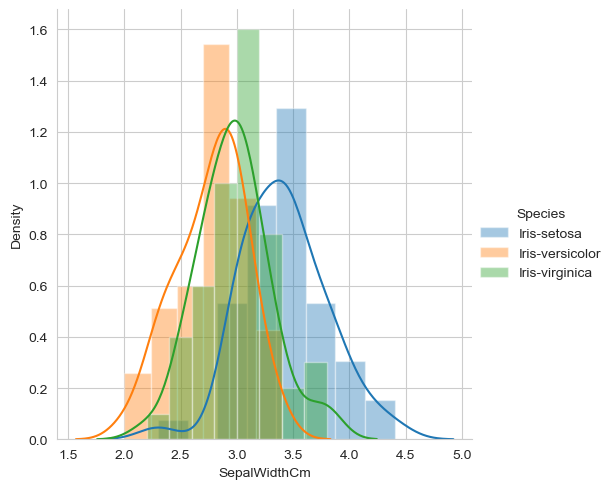

In [25]:
sns.FacetGrid(iris,hue="Species" , height =5)\
    .map(sns.distplot ,"SepalWidthCm")\
    .add_legend();
plt.show()

In [ ]:
#From above plots
# Incase of Sepal Length and Sepal Width there is huge overlapping 
#Incase of Petal length and Width there is minimum overlapping 

In [ ]:
Handling Correlation 

In [31]:
iris.select_dtypes(include =['number']).corr(method ="pearson")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [ ]:
HeatMaps

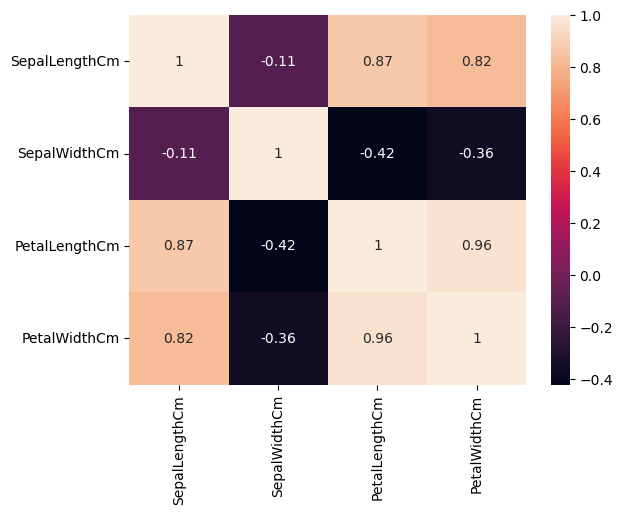

In [33]:
sns.heatmap(iris.select_dtypes(include =['number']).corr(method ='pearson').drop(['Id'],axis =1).drop(['Id'],axis=0),annot = True);
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


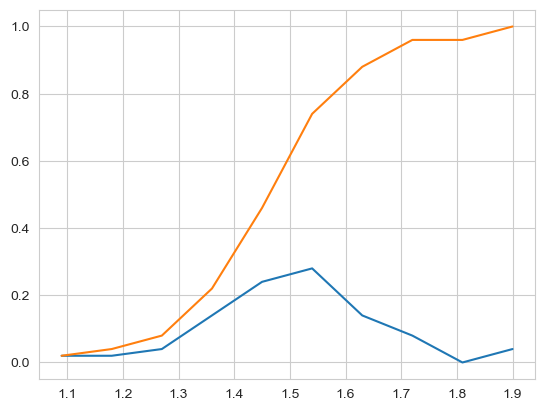

In [29]:
#Need For Cumulative Distribution Function (CDF)
#We can visually see what percentage of versicolor flowers have a
#Petal_length of less than 1.6?
#How to contruct a CDF
#How to read a CDF

#Plot CDF of petal_length

counts,bin_edges = np.histogram(iris_setosa["PetalLengthCm"] , bins =10 , 
                                density = True )
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();





                                

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


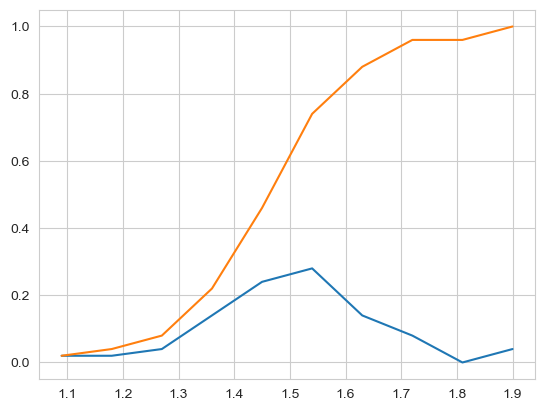

In [35]:
#Plots of CDF of PetalLengthCm for various types of flowers
#Misclassification error if you use PetalLengthCm only

counts,bin_edges = np.histogram(iris_setosa["PetalLengthCm"] , bins = 10 ,
                                density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] ,pdf)
plt.plot(bin_edges[1:] ,cdf)

plt.show();



[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


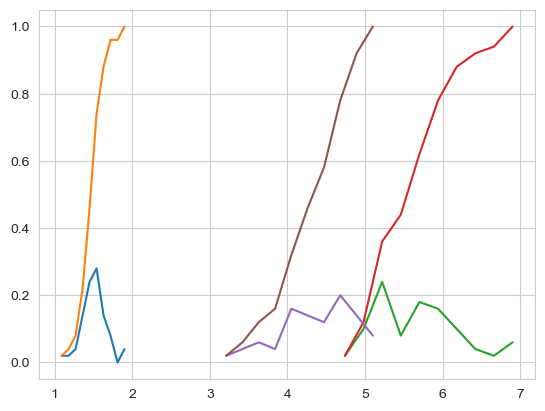

In [39]:
#Plots of CDF of PetalLengthCm for various types of flowers
#Misclassification error if you use PetalLengthCm only

#setosa
counts,bin_edges = np.histogram(iris_setosa["PetalLengthCm"] , bins = 10 ,
                                density = True )
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] ,pdf)
plt.plot(bin_edges[1:] ,cdf)

#virginica
counts,bin_edges = np.histogram(iris_virginica["PetalLengthCm"] ,bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] ,pdf)
plt.plot(bin_edges[1:] ,cdf)

#versicolor
counts,bin_edges = np.histogram(iris_versicolor["PetalLengthCm"] ,bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:] ,pdf)
plt.plot(bin_edges[1:] ,cdf)

plt.show()




In [59]:
#Mean Variance and Std-deviation,

print("Means:")
print("Iris_setosa =",np.mean(iris_setosa["PetalLengthCm"]))
#Mean with an outlier
print("Iris_setosa with an outlier =",np.mean(np.append(iris_setosa["PetalLengthCm"],50)));
print("Iris_virginica = ",np.mean(iris_virginica["PetalLengthCm"]))
print("Iris_versicolor = ",np.mean(iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print("Standard Deviation of Iris setosa :",np.std(iris_setosa["PetalLengthCm"]))
print("Standard Deviation of Iris virginica:",np.std(iris_virginica["PetalLengthCm"]))
print("Standard Deviation of Iris versicolor:",np.std(iris_versicolor["PetalLengthCm"]))



Means:
Iris_setosa = 1.464
Iris_setosa with an outlier = 2.4156862745098038
Iris_virginica =  5.5520000000000005
Iris_versicolor =  4.26

Std-dev:
Standard Deviation of Iris setosa : 0.17176728442867115
Standard Deviation of Iris virginica: 0.5463478745268441
Standard Deviation of Iris versicolor: 0.4651881339845204


In [21]:
#Median #Quantiles #Percentiles #IQR
print("\nMedians:")
print("Median od Setosa :" ,np.median(iris_setosa["PetalLengthCm"]))
#Median setosa with an outlier
# print("Median of Setosa with an outlier :",np.median(np.append(iris_setosa["PetalLengthCm"],50));
print("Median of Virginica :" , np.median(iris_virginica["PetalLengthCm"]))
print("Median of Versicolor :",np.median(iris_versicolor["PetalLengthCm"]));

print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"] , np.arange(0,100,25)))
print(np.percentile(iris_virginica["PetalLengthCm"] , np.arange(0,100,25)))
print(np.percentile(iris_versicolor["PetalLengthCm"] , np.arange(0,100,25)))

print("\n90th Percentiles :")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))





Medians:
Median od Setosa : 1.5
Median of Virginica : 5.55
Median of Versicolor : 4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles :
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


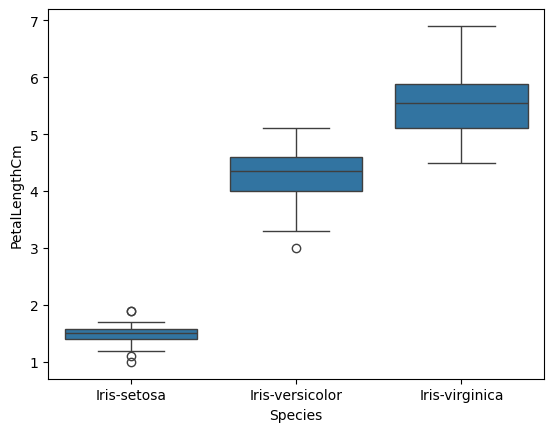

In [7]:
#Box Plot with whiskers :another method of visualizing the 1-D scatter plot
#The concept of median , percentile , quantile
#How to draw the box in the box-plot ?
#How to draw whiskers :[no standard way] Could use min and max or use other
#IQR like data 

#NOTE : IN the plot below , a technique call inter-quartle range is used in 
#Whiskers in the plot below do not correspond to the min and max values

#Box-Plot can be visualized as a PDF on the side-ways

sns.boxplot(x ="Species" , y ="PetalLengthCm",data = iris)
plt.show()

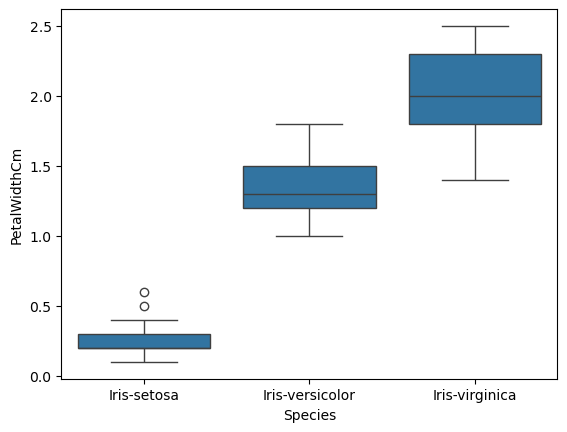

In [35]:
sns.boxplot(x ="Species" , y ="PetalWidthCm",data = iris)
plt.show()

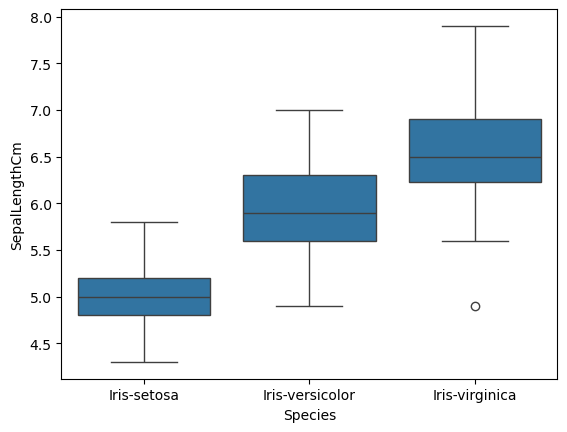

In [39]:
sns.boxplot(x ="Species" , y ="SepalLengthCm",data = iris)
plt.show()

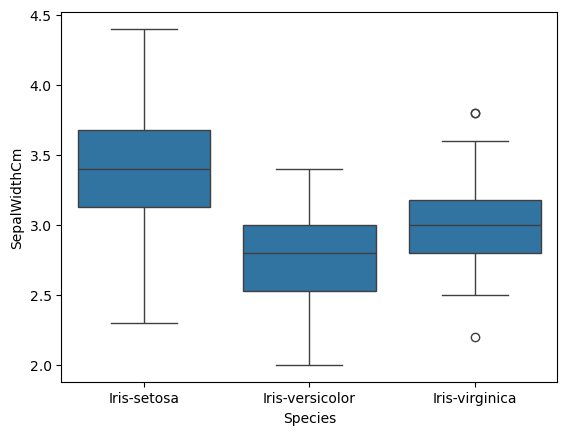

In [41]:
sns.boxplot(x ="Species" , y ="SepalWidthCm",data = iris)
plt.show()

In [ ]:
#